In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

import numpy as np
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering
import scipy
import admix
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from tqdm import tqdm
import gomics


def pval2zsc(pval):
    import scipy

    return -scipy.stats.norm.ppf(pval)


from utils import *

In [2]:
LDSC_DATA_DIR = "/u/project/pasaniuc/kangchen/DATA/ldsc/"


trait_list = [
    "PASS_ADHD_Demontis2018",
    "PASS_Alzheimers_Jansen2019",
    "PASS_BIP_Mullins2021",
    "PASS_Insomnia_Jansen2019",
    "PASS_Intelligence_SavageJansen2018",
    "PASS_MDD_Howard2019",
    "PASS_Schizophrenia_Pardinas2018",
    "PASS_VerbalNumericReasoning_Davies2018",
    "UKB_460K.body_BMIz",
    "UKB_460K.cov_EDU_COLLEGE",
    "UKB_460K.cov_EDU_YEARS",
    "UKB_460K.cov_SMOKING_STATUS",
    "UKB_460K.mental_NEUROTICISM",
    "PASS_SCZ_Trubetskoy2022",
    "PASS_ASD_Grove2019",
    "UKB_460K.body_HEIGHTz",
]
# +
# [
#     "PASS_BrainVolumnHeightCor_Jansen2020",
#     "PASS_SurfArea_Grasby2020",
#     "PASS_Thickness_Grasby2020",
#     "PASS_ICV_Adams2016",
# ]
# + [
#     "PASS_AmygdalaSubcorticalVolume_Satizabal2019",
#     "PASS_CaudateSubcorticalVolume_Satizabal2019",
#     "PASS_PallidumSubcorticalVolume_Satizabal2019",
#     "PASS_PutamenSubcorticalVolume_Satizabal2019",
#     "PASS_BrainstemSubcorticalVolume_Satizabal2019",
#     "PASS_AccumbensSubcorticalVolume_Satizabal2019",
#     "PASS_ThalamusSubcorticalVolume_Satizabal2019",
# ]

In [3]:
def group2name(group):
    dmr_pos = group.find("DMR")
    loop_pos = group.find("LOOP")
    is_summit = group.find("SUMMIT") != -1
    if "L2" in group:
        level = "L2"
    elif "L3" in group:
        level = "L3"
    else:
        loop_type = -1

    if dmr_pos == -1:
        # loop only
        if is_summit:
            name = f"{level} Loop summit only"
        else:
            name = f"{level} Loop only"
    elif loop_pos == -1:
        # DMR only
        name = f"{level} DMR only"
    else:
        assert (dmr_pos != -1) & (loop_pos != -1)
        # both
        loop_str = "Loop summit" if is_summit else "Loop"
        if dmr_pos < loop_pos:
            name = f"{level} DMR o.l. {loop_str}"
        else:
            name = f"{level} {loop_str} o.l. DMR"
    return name

In [4]:
dict_df_nlog10p = dict()
dict_df_zscore = dict()
dict_df_enrichment = dict()
dict_df_enrichment_se = dict()
dict_df_prop_snp = dict()

ROOT_DIR = "out/hsq_baseline"
# ROOT_DIR = "out-0726/hsq"

for p in tqdm(glob(ROOT_DIR + "/*")):
    group = p.split("/")[-1]
    name = group2name(group)

    # z-scores and p-values
    df_zscore = read_ldsc(
        root_dir=ROOT_DIR, trait_list=trait_list, group=group, field="coef_zsc"
    )
    df_pval = df_zscore.applymap(lambda z: admix.data.zsc2pval(z, two_sided=False))
    df_pval += 1e-200
    dict_df_zscore[name] = df_zscore
    dict_df_nlog10p[name] = -np.log10(df_pval)

    # enrichments
    dict_df_enrichment[name] = read_ldsc(
        root_dir=ROOT_DIR, trait_list=trait_list, group=group, field="enrichment"
    )
    dict_df_enrichment_se[name] = read_ldsc(
        root_dir=ROOT_DIR, trait_list=trait_list, group=group, field="enrichment_std"
    )
    dict_df_prop_snp[name] = read_ldsc(
        root_dir=ROOT_DIR, trait_list=trait_list, group=group, field="prop_snp"
    )

 57%|█████▋    | 8/14 [04:32<04:19, 43.24s/it]

out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/UKB_460K.cov_EDU_YEARS.results does not exist
out/hsq_baseline/L3LOOP/HPC_3T_Astro/UKB_460K.cov_S

 64%|██████▍   | 9/14 [05:35<04:06, 49.34s/it]

out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseline/L3LOOPSUMMIT/HPC_3T_Astro/UKB_460K.cov_EDU_YEARS.results 

 71%|███████▏  | 10/14 [06:39<03:34, 53.73s/it]

out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseline/L3LOOP-L3DMR/HPC_3T_Astro/UKB_460K.cov_EDU_YEARS.results 

 79%|███████▊  | 11/14 [07:42<02:50, 56.74s/it]

out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseline/L3DMR-L3LOOP/HPC_3T_Astro/UKB_460K.cov_EDU_YEARS.results 

 86%|████████▌ | 12/14 [08:46<01:57, 58.73s/it]

out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3LOOPSUMMIT-L3DMR/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseli

 93%|█████████▎| 13/14 [09:49<01:00, 60.27s/it]

out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_ADHD_Demontis2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_Alzheimers_Jansen2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_BIP_Mullins2021.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_Insomnia_Jansen2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_Intelligence_SavageJansen2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_MDD_Howard2019.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_Schizophrenia_Pardinas2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/PASS_VerbalNumericReasoning_Davies2018.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/UKB_460K.body_BMIz.results does not exist
out/hsq_baseline/L3DMR-L3LOOPSUMMIT/HPC_3T_Astro/UKB_460K.cov_EDU_COLLEGE.results does not exist
out/hsq_baseli

100%|██████████| 14/14 [10:52<00:00, 46.60s/it]


In [5]:
df_sum = []

for method in dict_df_zscore:
    df_method = None
    for name, dict_df in zip(
        ["coef_z", "coef_nlog10p", "enrichment", "enrichment_se", "prop_snp"],
        [
            dict_df_zscore,
            dict_df_nlog10p,
            dict_df_enrichment,
            dict_df_enrichment_se,
            dict_df_prop_snp,
        ],
    ):
        df_tmp = dict_df[method].reset_index().melt(id_vars="index")
        df_tmp.columns = ["trait", "ct", name]
        if df_method is None:
            df_method = df_tmp
        else:
            assert np.all(df_method[["trait", "ct"]] == df_tmp[["trait", "ct"]])
            df_method[name] = df_tmp[name]
    df_method.insert(2, "method", method)
    df_sum.append(df_method)
df_sum = pd.concat(df_sum)
df_sum = df_sum.sort_values(["trait", "ct"])
df_sum.to_csv("results/baseline_h2.v2.tsv", sep="\t", index=False)

In [6]:
trait = "PASS_Intelligence_SavageJansen2018"
trait = "PASS_BrainVolumnHeightCor_Jansen2020"
trait = "PASS_SurfArea_Grasby2020"
trait = "PASS_ASD_Grove2019"
# trait = "PASS_Thickness_Grasby2020"

In [6]:
for trait in [
    "PASS_ASD_Grove2019",
]:
    df_tmp = df_sum[(df_sum.trait == trait) & (df_sum.prop_snp > 0.005)]
    print(trait)
    display(df_tmp.sort_values("coef_z", ascending=False).head())

PASS_ASD_Grove2019


,trait,ct,method,coef_z,coef_nlog10p,enrichment,enrichment_se,prop_snp
830,PASS_ASD_Grove2019,PFC_3T_Exc_L4_RORB,L3 DMR o.l. Loop summit,4.985414,6.509836,25.059949,4.748979,0.006421
1790,PASS_ASD_Grove2019,PFC_adult_Exc_DL_ASTN1,L3 DMR o.l. Loop,4.556371,5.584651,12.890625,2.490679,0.014965
254,PASS_ASD_Grove2019,PFC_adult_Exc_DL,L2 DMR o.l. Loop,4.499607,5.468015,10.637991,2.056256,0.020573
1806,PASS_ASD_Grove2019,PFC_adult_Exc_DL_ASTN1,L3 DMR only,4.483634,5.435438,10.877725,2.106419,0.026995
894,PASS_ASD_Grove2019,PFC_adult_Exc_DL,L2 DMR only,4.431975,5.330804,9.905892,1.896427,0.032512


In [8]:
# df_sum_baseline = pd.read_csv("results/baseline_h2.tsv", sep="\t").sort_values(
#     ["trait", "ct", "method"]
# )
# df_sum_baselineld = pd.read_csv("results/baselineLD_h2.tsv", sep="\t").sort_values(
#     ["trait", "ct", "method"]
# )

In [9]:
plot_trait_list = [
    "PASS_Schizophrenia_Pardinas2018",
    "PASS_Intelligence_SavageJansen2018",
]

In [11]:
# for each trait,
# displayed cell type must have nominally significant p-value for all types of annotation

In [11]:
for trait in ["PASS_Schizophrenia_Pardinas2018", "PASS_Intelligence_SavageJansen2018"]:
    print(f"## {trait}")
    # filter for significant cell types
    signif_ct_list = set(dict_df_zscore["L2 DMR only"].columns)
    for annot in dict_df_zscore:
        print(len(signif_ct_list))
        if "summit" in annot:
            continue
        signif_ct_list = signif_ct_list & set(
            dict_df_zscore[annot].columns[
                dict_df_zscore[annot].loc[trait, :] > Z_threshold
            ]
        )
    signif_ct_list = list(signif_ct_list)

    # form display items
    dict_df_display = {
        annot: dict_df_enrichment[annot].loc[[trait], signif_ct_list]
        for annot in dict_df_enrichment
        if "summit" not in annot
    }

    dict_df_display_se = {
        annot: dict_df_enrichment_se[annot].loc[[trait], signif_ct_list]
        for annot in dict_df_enrichment_se
        if "summit" not in annot
    }

    gomics.plot.plot_bars2(
        dict_df=dict_df_display,
        traits=[trait],
        xlabel="$h^2$ enrichment",
        xlim=70,
        dict_df_se=dict_df_display_se,
        figsize=(1.5, 6.0),
        legend_bbox_to_anchor=(1.73, 0.5),
    )

    dict_title = {
        "PASS_Schizophrenia_Pardinas2018": "SCZ (Pardinas et al. 2018)",
        "PASS_Intelligence_SavageJansen2018": "Intelligence (Savage et al. 2018)",
    }
    plt.title(dict_title[trait], fontsize=8)

## PASS_Schizophrenia_Pardinas2018
62


NameError: name 'Z_threshold' is not defined

In [41]:
import matplotlib.transforms as mtrans


def plot_heatmap(
    df,
    dpi=150,
    squaresize=20,
    heatmap_linewidths=0.5,
    heatmap_linecolor="gray",
    heatmap_xticklabels=True,
    heatmap_yticklabels=True,
    heatmap_cbar=True,
    heatmap_cbar_kws=dict(use_gridspec=False, location="top", fraction=0.03, pad=0.01),
    heatmap_vmin=-5,
    heatmap_vmax=5,
    xticklabels_rotation=45,
    colormap_n_bin=10,
):
    figwidth = df.shape[1] * squaresize / float(dpi)
    figheight = df.shape[0] * squaresize / float(dpi)
    fig, ax = plt.subplots(1, figsize=(figwidth, figheight), dpi=dpi)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    sns.heatmap(
        df,
        cmap="RdBu_r",
        linewidths=heatmap_linewidths,
        linecolor=heatmap_linecolor,
        square=True,
        ax=ax,
        xticklabels=heatmap_xticklabels,
        yticklabels=heatmap_yticklabels,
        cbar=heatmap_cbar,
        cbar_kws=heatmap_cbar_kws,
        vmin=heatmap_vmin,
        vmax=heatmap_vmax,
    )

    plt.yticks(fontsize=8)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=xticklabels_rotation,
        va="top",
        ha="right",
        fontsize=8,
    )
    ax.tick_params(left=False, bottom=False, pad=-2)
    trans = mtrans.Affine2D().translate(5, 0)
    for t in ax.get_xticklabels():
        t.set_transform(t.get_transform() + trans)
    return fig, ax

In [39]:
df_zscore = dict_df_zscore["DMR only"].copy()
df_zscore = df_zscore[sorted(df_zscore.columns)]

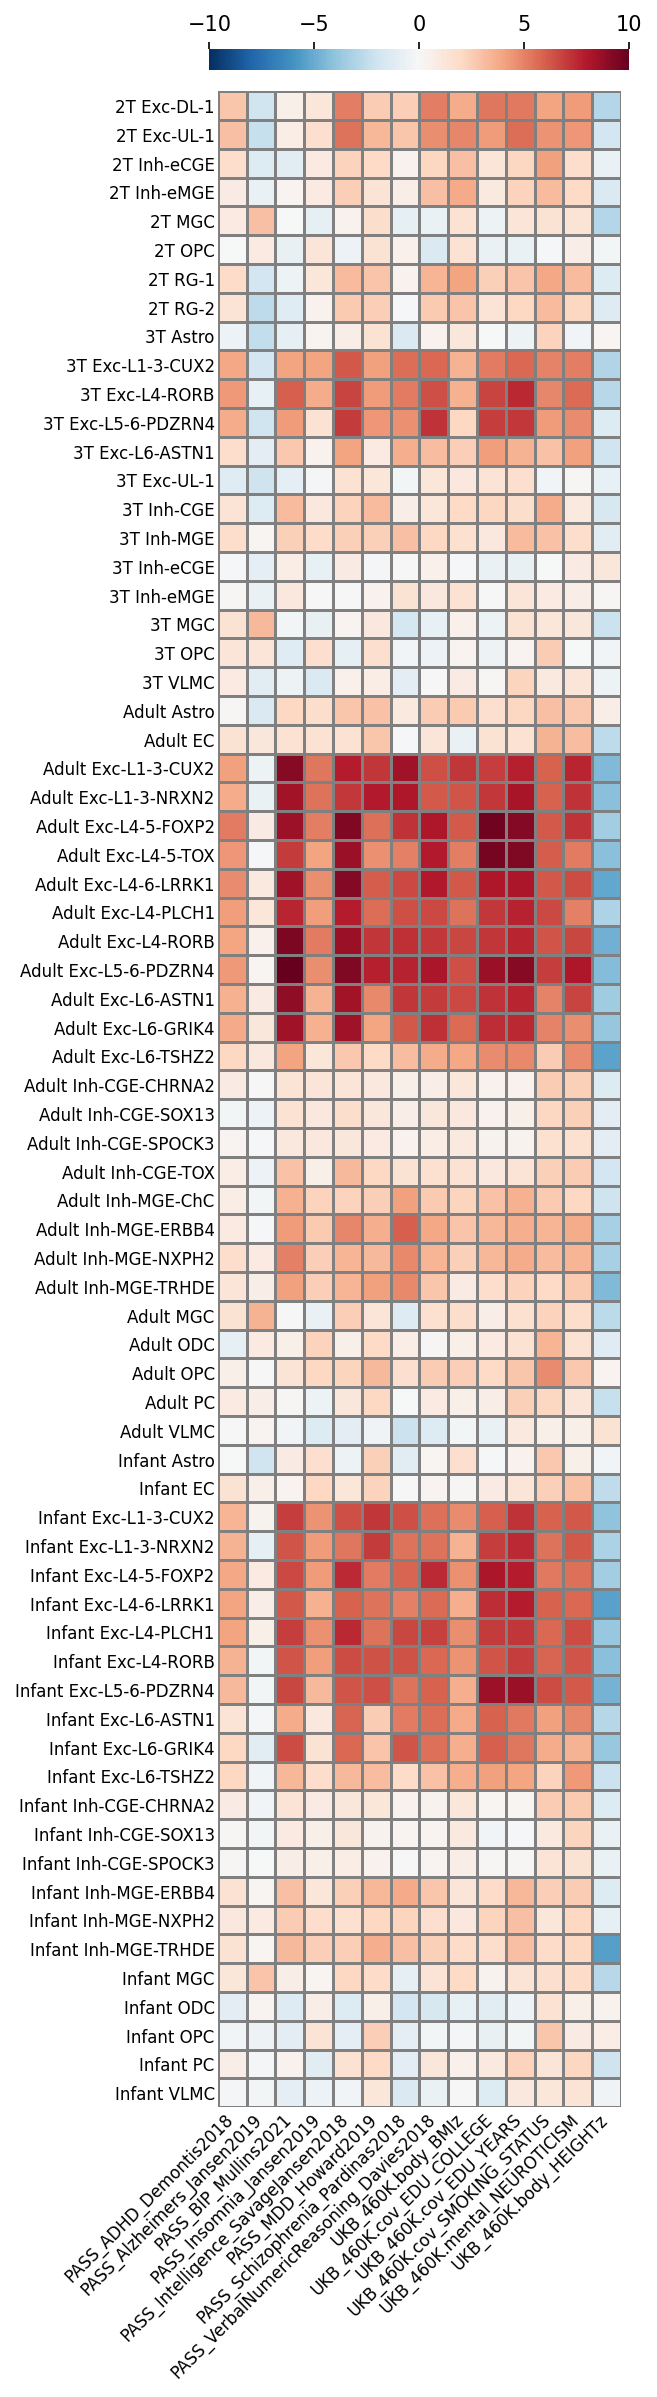

In [40]:
fig, ax = plot_heatmap(df_zscore.T, heatmap_vmin=-10, heatmap_vmax=10)